In [4]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
#x, sr = librosa.load('audio.wav')
import scipy
from scipy.fft import fft, fftfreq
from scipy import fftpack
import warnings
warnings.filterwarnings(action="ignore")

import math as m
import os
import time


(176400,)


array([1.4787996e-10, 2.1815043e-10, 1.9371701e-10, ..., 4.4540011e-05,
       3.8990798e-05, 3.5029720e-05], dtype=float32)

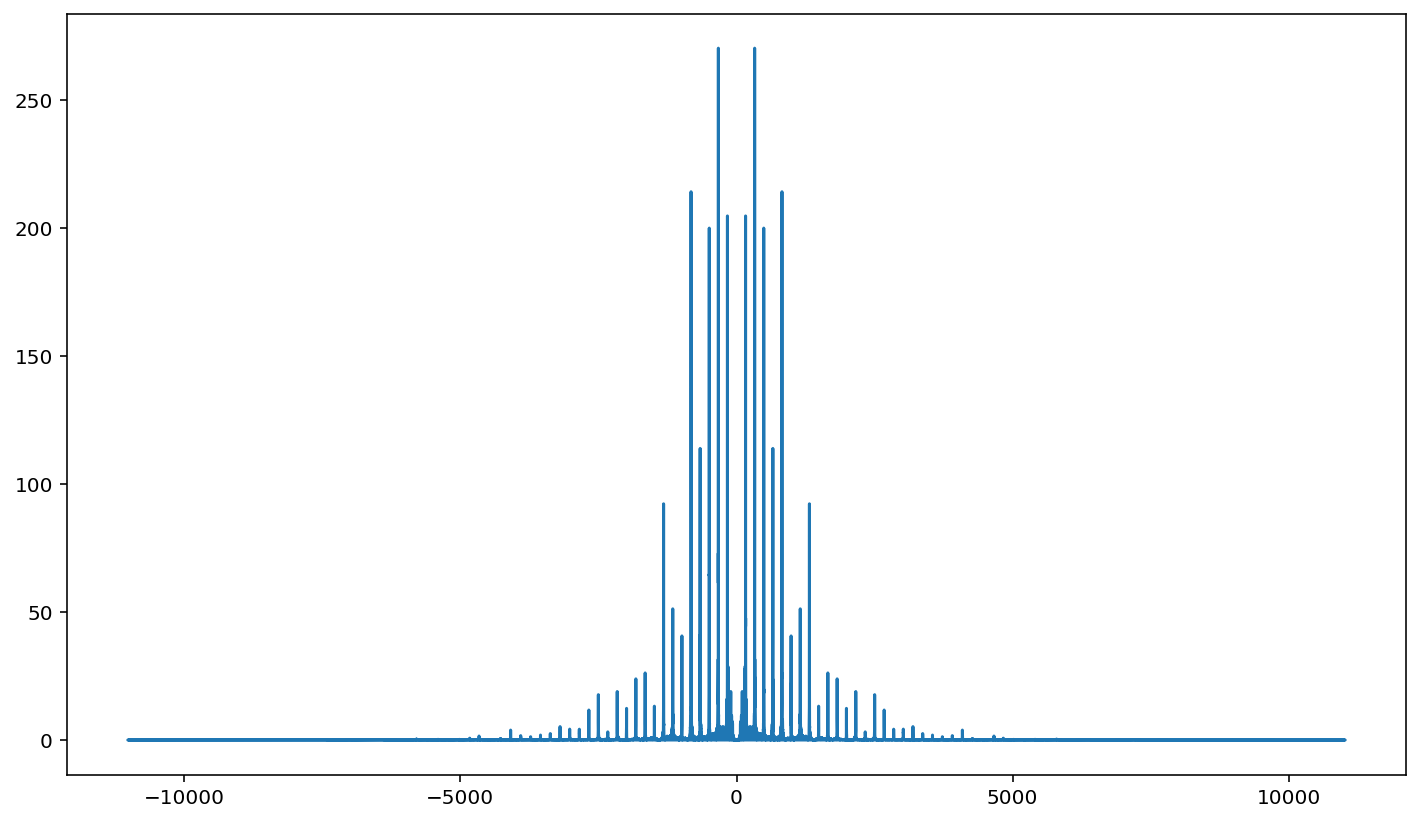

In [5]:
def wood():
    x, sr = librosa.load('Wood pigeon.wav')
    N = len(x)
    yf = np.abs(fft(x)) ##power
#     print(yf)
    yfn = fft(x) ## freq vector
    xf = fftfreq(N, 1 / sr) ## 
    return x

def note():
    x, sr = librosa.load('SINGLE NOTE E.wav')
    N = len(x)
    yf = np.abs(fft(x))
#     print(yf)
    yfn = fft(x)
    xf = fftfreq(N, 1 / sr)
    plt.plot(xf,yf)
    print(xf.shape)
    return x

def great():
    x, sr = librosa.load('great tit.wav')
    N = len(x)
    yf = np.abs(fft(x))
#     print(yf)
    yfn = fft(x)
    xf = fftfreq(N, 1 / sr)
    return x


def loop_corr():
    comp_list = [wood(), great(), note()]
    for track in comp_list:
        corr1 = np.correlate(track, wood())
        print(corr1)
        corr2 = np.correlate(track, great())
        print(corr2)
        corr3 = np.correlate(track, note())
        print(corr3)
        
        
def corr():
    wood_pigeon = wood()
    great_tit = great()
    corr = scipy.signal.correlate(wood_pigeon, great_tit, mode = "valid", method = "fft")
#     mode = "valid", method = "fft"
    return corr

def corr2():
    wood_pigeon = wood()
    great_tit = great()
    corr = scipy.signal.correlate(great_tit, great_tit, mode = "valid", method = "fft")
    return corr

def corr3():
    wood_pigeon = wood()
    great_tit = great()
    corr = scipy.signal.correlate(wood_pigeon, wood_pigeon, mode = "valid", method = "fft")
    return corr

def corr4():
    note_E = note()
    great_tit = great()
    corr = scipy.signal.correlate(note_E, great_tit, mode = "valid", method = "fft")
    return corr

def corr5():
    note_E = note()
    great_tit = great()
    corr = scipy.signal.correlate(note_E, note_E, mode = "valid", method = "fft")
    return corr

def sigmoid(num): #to normalize from 0 to 1
    return 1/(1+m.exp(-num))

# print("same E:", corr5())

# print("diff E & great", corr4())
# print(sigmoid(max(corr4())))

# print("Same great:", corr2())
# print(sigmoid(max(corr2())))

# print("Same wood:", corr3())
# print(sigmoid(max(corr3())))

# print("Diff:", corr())
# print(sigmoid(max(corr())))

# print("Same E:", corr5())
# print(sigmoid(max(corr5())))

# plt.plot()

note()

In [6]:
def sound_correlation(file1, file2, mode = "valid", method = "fft", sim_num = 0.95):
    x1, sr1 = librosa.load(file1)
    x2, sr2 = librosa.load(file2)
    corr = scipy.signal.correlate(x1, x2, mode, method)
    print(corr)
#     print(corr)
    similarity_num = sigmoid(max(corr))
    print(similarity_num)
    if similarity_num >= sim_num:
        return True
    return False
## need more tests

In [7]:
sound_correlation('Database Files//Wren.wav', 'Database Files//Blue Tit.wav')

[-2.8852026  0.8746011  2.0751297 ... -1.0929987  3.8687904  1.5920265]
0.9999997675856963


True

In [4]:
def corr_test():
    bool_12 = sound_correlation('wren.wav', 'wren2.wav')
    bool_23 = sound_correlation('wren2.wav', 'wren3.wav')
    bool_13 = sound_correlation('wren.wav', 'wren3.wav')
    assert(bool_12 == True and bool_23 == True and bool_13 == True),"sound_correlation failed"
    print("pass")
corr_test()

0.9999999999998308


0.9955876940923053


0.9587894774149033
pass


In [18]:
def corr_test2():
    bool_Enote = sound_correlation('SINGLE NOTE E.wav', 'E_note_rec.wav')
    assert(bool_Enote == True), "Notes dont match"
    print("pass test")
    
corr_test2()

[2.8390377  2.6260207  2.3760388  ... 0.15022303 0.15758362 0.16394448]
1.5126161519908358e-07


AssertionError: Notes dont match

In [6]:
def corr_test3():
    bool_kimi = sound_correlation('kimi_1.wav', 'kimi_2.wav') # same few notes 
    assert(bool_kimi == True), "Notes dont match"
    print("pass test")
    
corr_test3()

0.9956162483896112
pass test


In [7]:
def corr_test4(): 
    bool_Enote = sound_correlation('SINGLE NOTE E.wav', 'E_high_note.wav') # different octave
#     bool_CS = sound_correlation('C#_chord_rec.wav','soft-piano-chord_C#_major.wav') # different variant
    assert(bool_Enote == False and bool_CS == False), "Notes are not the same"
    print("pass test")
    
corr_test4()

0.5403218275589151


0.6157386282523007
pass test


In [8]:
import os
def corr_test5(file1, file2):
    cwd = os.getcwd()
    filename = "Sound files"
    sound_path = os.path.join(cwd, filename)
    comp1 = os.path.join(sound_path, file1)
    comp2 = os.path.join(sound_path, file2)
    bool_comp = sound_correlation(comp1, comp2)
    return bool_comp

corr_test5('Time trav 2.wav','Time trav 1.wav')

1.0


True

In [21]:
import os
def same_files(): #returns files which are the same/similar
    cwd = os.getcwd()
    foldname = "Piano Notes"
    sound_path = os.path.join(cwd, foldname)
    filelist = os.listdir(sound_path)
    folder_length = len(filelist)
    count = 0
    same_dict = {} #Key: count , value: pair1 pair2
    for file_num1 in range(folder_length):
        for file_num2 in range(file_num1 + 1, folder_length - file_num1):
            count += 1
            file1 = filelist[file_num1]
            file2 = filelist[file_num2]
            
            comp1 = os.path.join(sound_path, file1)
            comp2 = os.path.join(sound_path, file2)
            bool_comp = sound_correlation(comp1, comp2)
            print("Pair {} --> Comparing: {} & {}".format(count, file1, file2))
            if bool_comp == True:
                print("{} & {} are the same.".format(file1, file2))
                print("*"*30,"\n")
                same_dict[count] = [file1, file2]
            else:
                print("Doesnt match")
                print("*"*30,"\n")
    return same_dict
start_time = time.time()
print(same_files())
print("--- %s seconds ---" % (time.time() - start_time))


0.6481847037881252
Pair 1 --> Comparing: Rec C.wav & Rec D.wav
Doesnt match
****************************** 



0.999999999993197
Pair 2 --> Comparing: Rec C.wav & Rec C 1.wav
Rec C.wav & Rec C 1.wav are the same.
****************************** 



0.6031215552113846
Pair 3 --> Comparing: Rec C.wav & Rec E.wav
Doesnt match
****************************** 



0.5497551265258906
Pair 4 --> Comparing: Rec C.wav & Rec B.wav
Doesnt match
****************************** 



0.5141167366104568
Pair 5 --> Comparing: Rec C.wav & Rec A.wav
Doesnt match
****************************** 



0.6239063107494017
Pair 6 --> Comparing: Rec C.wav & Rec F.wav
Doesnt match
****************************** 



0.8309921701456504
Pair 7 --> Comparing: Rec C.wav & Rec G.wav
Doesnt match
****************************** 



0.5067793139146299
Pair 8 --> Comparing: Rec C.wav & SINGLE NOTE E.wav
Doesnt match
****************************** 



0.7035288033782444
Pair 9 --> Comparing: Rec D.wav & Rec C 1.wav
Doesnt match
****************************** 



0.5922646656356958
Pair 10 --> Comparing: Rec D.wav & Rec E.wav
Doesnt match
****************************** 



0.6126856290982909
Pair 11 --> Comparing: Rec D.wav & Rec B.wav
Doesnt match
****************************** 



0.649002498587606
Pair 12 --> Comparing: Rec D.wav & Rec A.wav
Doesnt match
****************************** 



0.7789034264486132
Pair 13 --> Comparing: Rec D.wav & Rec F.wav
Doesnt match
****************************** 



0.6684487692327337
Pair 14 --> Comparing: Rec D.wav & Rec G.wav
Doesnt match
****************************** 



0.6437895869805299
Pair 15 --> Comparing: Rec C 1.wav & Rec E.wav
Doesnt match
****************************** 



0.5701263837228367
Pair 16 --> Comparing: Rec C 1.wav & Rec B.wav
Doesnt match
****************************** 



0.5199488769198608
Pair 17 --> Comparing: Rec C 1.wav & Rec A.wav
Doesnt match
****************************** 



0.6716854718962018
Pair 18 --> Comparing: Rec C 1.wav & Rec F.wav
Doesnt match
****************************** 



0.6061364810131336
Pair 19 --> Comparing: Rec E.wav & Rec B.wav
Doesnt match
****************************** 



0.6034842166015143
Pair 20 --> Comparing: Rec E.wav & Rec A.wav
Doesnt match
****************************** 

{2: ['Rec C.wav', 'Rec C 1.wav']}
--- 5.566366195678711 seconds ---
